## Jack Lee
## Song Genre Classification


# Data Cleaning

In [ ]:
import random
random.seed(19927598)

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
music = pd.read_csv("/content/drive/MyDrive/FML/musicData.csv")
music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [ ]:
print(music['key'].nunique())

12


In [ ]:
music['mode'].nunique()
print(music['mode'].nunique())

2


In [ ]:
music.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
music[music.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping NaNs From Dataset

In [ ]:
music = music.dropna()
music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


Encoding Dummy Variables For Categorical Columns

In [ ]:
key_unique_cat = music['key'].unique()
mode_unique_cat = music['mode'].unique()
genre_unique_cat = music['music_genre'].unique()

In [ ]:
print(key_unique_cat)
print(mode_unique_cat)
print(genre_unique_cat)

['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#']
['Minor' 'Major']
['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


In [ ]:
genre_count = music['music_genre'].value_counts()
genre_count

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [ ]:
#replace string labels into numerical labels
for i in range(len(key_unique_cat)):
  music.loc[music['key'] == key_unique_cat[i], 'key'] = i
for i in range(len(mode_unique_cat)):
  music.loc[music['mode'] == mode_unique_cat[i], 'mode'] = i
for i in range(len(genre_unique_cat)):
  music.loc[music['music_genre'] == genre_unique_cat[i], 'music_genre'] = i
music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,0,0.115,-5.201,0,0.0748,100.889,4-Apr,0.759,0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,1,0.124,-7.043,0,0.0300,115.00200000000001,4-Apr,0.531,0
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,2,0.534,-4.617,1,0.0345,127.994,4-Apr,0.333,0
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,3,0.157,-4.498,1,0.2390,128.014,4-Apr,0.270,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,4,0.157,-6.266,1,0.0413,145.036,4-Apr,0.323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,3,0.119,-7.022,1,0.2980,98.02799999999999,4-Apr,0.330,9
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,5,0.109,-9.814,1,0.0550,122.04299999999999,4-Apr,0.113,9
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,1,0.143,-5.443,1,0.1460,131.079,4-Apr,0.395,9
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,6,0.106,-5.016,0,0.0441,75.88600000000001,4-Apr,0.354,9


In [ ]:
#change these columns into integer type
music['key'] = music['key'].astype(int)
music['mode'] = music['mode'].astype(int)
music['music_genre'] = music['music_genre'].astype(int)

<ipython-input-282-49f51bb43fee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['key'] = music['key'].astype(int)
<ipython-input-282-49f51bb43fee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['mode'] = music['mode'].astype(int)
<ipython-input-282-49f51bb43fee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
#running this code gives error: could not convert string to float: '?'
#"?" should not be a value in tempo
#music['tempo'] = music['tempo'].astype(float)

In [ ]:
#to confirm that the tempo column had dirty data
#will impute later
music.describe(include="all")

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
count,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,50000.000000,50000.00000
unique,NaN,6863,41699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29394,5,NaN,NaN
top,NaN,empty_field,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,4-Apr,NaN,NaN
freq,NaN,2489,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4980,44748,NaN,NaN
mean,55888.396360,NaN,NaN,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,5.352080,0.193896,-9.133761,0.641980,0.093586,NaN,NaN,0.456264,4.50000
std,20725.256253,NaN,NaN,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,3.233117,0.161637,6.162990,0.479423,0.101373,NaN,NaN,0.247119,2.87231
min,20002.000000,NaN,NaN,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.000000,0.009670,-47.046000,0.000000,0.022300,NaN,NaN,0.000000,0.00000
25%,37973.500000,NaN,NaN,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,3.000000,0.096900,-10.860000,0.000000,0.036100,NaN,NaN,0.257000,2.00000
50%,55913.500000,NaN,NaN,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,6.000000,0.126000,-7.276500,1.000000,0.048900,NaN,NaN,0.448000,4.50000
75%,73863.250000,NaN,NaN,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,8.000000,0.244000,-5.173000,1.000000,0.098525,NaN,NaN,0.648000,7.00000


In [ ]:
music.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre           int64
dtype: object

In [ ]:
key_dummies = pd.get_dummies(music['key'], prefix='key', prefix_sep='_')
key_dummies.drop('key_0', axis=1, inplace=True)

# Replace column 10 with the dummy variables
music.drop('key', axis=1, inplace=True)
music = pd.concat([music, key_dummies], axis=1)

<ipython-input-286-033eb0e0db94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music.drop('key', axis=1, inplace=True)


Dropping Linguistic Properties of a Song

In [ ]:
music = music.drop(['instance_id','artist_name', 'track_name', 'obtained_date'], axis=1)
music

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0,0.0748,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0,0.0300,...,0,0,0,0,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1,0.0345,...,1,0,0,0,0,0,0,0,0,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1,0.2390,...,0,1,0,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1,0.0413,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,1,0.2980,...,0,1,0,0,0,0,0,0,0,0
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,1,0.0550,...,0,0,0,1,0,0,0,0,0,0
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,1,0.1460,...,0,0,0,0,0,0,0,0,0,0
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0,0.0441,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo                object
valence             float64
music_genre           int64
key_1                 uint8
key_2                 uint8
key_3                 uint8
key_4                 uint8
key_5                 uint8
key_6                 uint8
key_7                 uint8
key_8                 uint8
key_9                 uint8
key_10                uint8
key_11                uint8
dtype: object

Splitting Data into Train and Test Sets

In [ ]:
#list of unique genres
genres = music['music_genre'].unique()

#initialize empty datasets for training and testing
train_music = pd.DataFrame()
test_music = pd.DataFrame()

#loop through each genre
for genre in genres:
    #filter the dataset by genre
    genre_df = music[music['music_genre'] == genre]

    #randomly select 500 rows for testing
    test_rows = np.random.choice(genre_df.index, size=500, replace=False)

    #put the 500 rows in test_set
    test_set = genre_df.loc[test_rows]
    #drop the selected 500 rows and add the rest to the train_set
    train_set = genre_df.drop(test_rows)

    #append the training and testing sets to the overall datasets
    train_music = train_music.append(train_set)
    test_music = test_music.append(test_set)


<ipython-input-289-fb9ff5a7006d>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_music = train_music.append(train_set)
<ipython-input-289-fb9ff5a7006d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_music = test_music.append(test_set)
<ipython-input-289-fb9ff5a7006d>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_music = train_music.append(train_set)
<ipython-input-289-fb9ff5a7006d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_music = test_music.append(test_set)
<ipython-input-289-fb9ff5a7006d>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

Imputing

In [ ]:
mode_unique = music['mode'].unique()
genre_unique = music['music_genre'].unique()

In [ ]:
#impute duration_ms where values in that column equal -1 with the median of the duration of the song of each genre
imputed_values_duration = []
for i in range(len(genre_unique)):
  median_value = train_music.loc[train_music['music_genre'] == genre_unique[i], 'duration_ms'].median()
  imputed_values_duration.append(median_value)
  train_music.loc[(train_music['duration_ms'] == -1.0) & (train_music['music_genre'] == genre_unique[i]), 'duration_ms'] = median_value

In [ ]:
#uses the median of duration_ms of each genre computed in the training set and impute that same value to the test set
for i in range(len(genre_unique)):
  test_music.loc[(test_music['duration_ms'] == -1) & (test_music['music_genre'] == genre_unique[i]), 'duration_ms'] = imputed_values_duration[i]

In [ ]:
#impute tempo where values in that column equal ? with the median of the tempo of the song of each genre
imputed_values_tempo = []
for i in range(len(genre_unique)):
  #replace ? with -1 so .median() function works
  # does not have to be -1, can be any number
  train_music['tempo'] = train_music['tempo'].replace("?", -1)
  median_value = train_music.loc[train_music['music_genre'] == genre_unique[i], 'tempo'].median()
  imputed_values_tempo.append(median_value)
  train_music.loc[(train_music['tempo'] == -1) & (train_music['music_genre'] == genre_unique[i]), 'tempo'] = median_value

In [ ]:
#same as duration_ms
#use median of tempo of each genre computed in the training set and impute that same value to the test set
for i in range(len(genre_unique)):
  test_music.loc[(test_music['tempo'] == '?') & (test_music['music_genre'] == genre_unique[i]), 'tempo'] = imputed_values_tempo[i]

In [ ]:
train_music['tempo'] = train_music['tempo'].astype(float)
test_music['tempo'] = test_music['tempo'].astype(float)

In [ ]:
train_music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
key_1                 uint8
key_2                 uint8
key_3                 uint8
key_4                 uint8
key_5                 uint8
key_6                 uint8
key_7                 uint8
key_8                 uint8
key_9                 uint8
key_10                uint8
key_11                uint8
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#columns to normalize
columns_to_normalize = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

#fit the scaler to the selected columns and transform the training set
train_music[columns_to_normalize] = scaler.fit_transform(train_music[columns_to_normalize])

#scaling parameters learned from the training data are used to transform test set
test_music[columns_to_normalize] = scaler.transform(test_music[columns_to_normalize])

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train_features = train_music.drop('music_genre', axis=1)
train_target = train_music['music_genre']

test_features = test_music.drop('music_genre', axis=1)
test_target = test_music['music_genre']

pca = PCA(whiten=True)
X_train = pca.fit_transform(train_features)
X_test = pca.transform(test_features)

In [ ]:
#eigenvalues for each principal components
eig_vals = pca.explained_variance_
loadings = pca.components_
#variance explained by each PC
var_explained = eig_vals/sum(eig_vals)*100

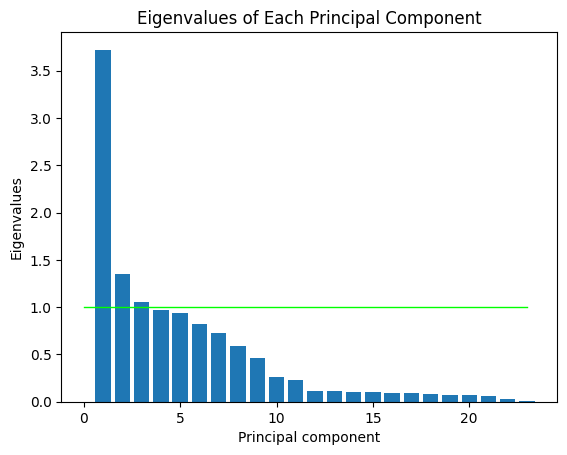

In [ ]:
import matplotlib.pyplot as plt
num_classes = 23
plt.bar(np.linspace(1,num_classes,num_classes),eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of Each Principal Component')
plt.plot([0,num_classes],[1,1],color='lime',linewidth=1)

In [ ]:
var_explained

array([30.80580795, 11.21117271,  8.7399351 ,  8.0213685 ,  7.7991425 ,
        6.77064063,  6.02629505,  4.91874734,  3.82104443,  2.13722817,
        1.92726937,  0.93600401,  0.93046425,  0.8798799 ,  0.87119637,
        0.80586372,  0.72382286,  0.64976172,  0.62183145,  0.55735296,
        0.5200143 ,  0.27912525,  0.04603144])

In [ ]:
sum(var_explained[:8])

84.29310978892991

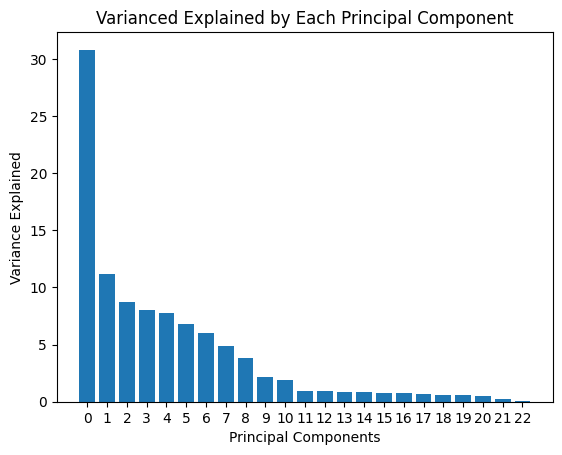

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(var_explained)), var_explained)

ax.set_xticks(np.arange(len(var_explained)))
ax.set_xticklabels(np.arange(len(var_explained)))

ax.set_xlabel('Principal Components')
ax.set_ylabel('Variance Explained')
ax.set_title('Varianced Explained by Each Principal Component')

plt.show()


In [ ]:
eig_vals

array([3.7205951 , 1.35403799, 1.05557237, 0.96878694, 0.94194742,
       0.81772932, 0.72783041, 0.59406549, 0.46148957, 0.25812537,
       0.23276744, 0.1130466 , 0.11237753, 0.10626817, 0.10521941,
       0.09732881, 0.08742026, 0.07847547, 0.07510217, 0.06731473,
       0.06280513, 0.03371157, 0.00555948])

In [ ]:
pca = PCA(n_components = 2, whiten=True)
X_train = pca.fit_transform(train_features)
X_test = pca.transform(test_features)
pca.explained_variance_ratio_

array([0.30805808, 0.11211173])

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):  #different number of clusters
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(X_train)
    labels = kmeans.labels_
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)
    print("k = {}, silhouette score = {:.3f}".format(k, score))

#find the optimal number of clusters
optimal_k = np.argmax(silhouette_scores) + 2  #add 2 to account for starting k value of 2
print("Optimal number of clusters:", optimal_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 2, silhouette score = 0.445


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 3, silhouette score = 0.419


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 4, silhouette score = 0.355


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 5, silhouette score = 0.361


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 6, silhouette score = 0.359


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 7, silhouette score = 0.334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 8, silhouette score = 0.346


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 9, silhouette score = 0.328


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 10, silhouette score = 0.334
Optimal number of clusters: 2


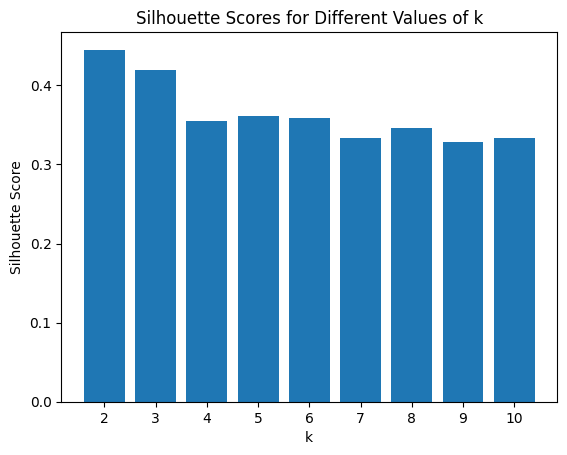

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(silhouette_scores)), silhouette_scores)

ax.set_xticks(np.arange(len(silhouette_scores)))
ax.set_xticklabels(np.arange(len(silhouette_scores))+2)

ax.set_xlabel('k')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Different Values of k')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

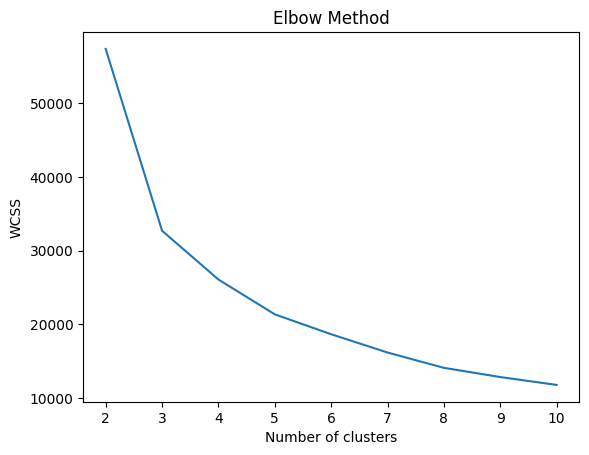

In [ ]:
elbow = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    elbow.append(kmeans.inertia_)

plt.plot(range(2, 11), elbow)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


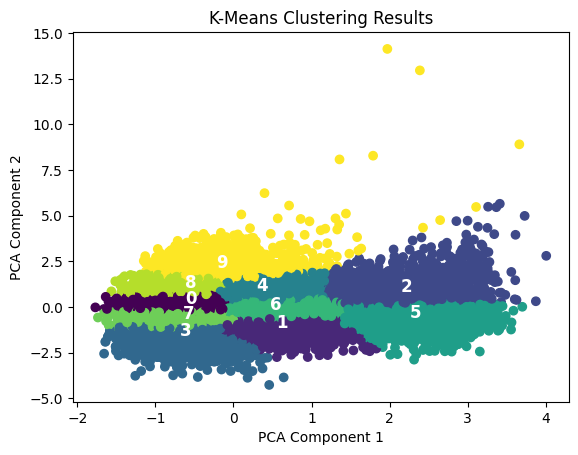

In [ ]:
from sklearn.cluster import KMeans

#fit a k-means clustering algorithm to the PCA-transformed data
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(X_train)

#plot the resulting clusters
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters)
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

centers = kmeans.cluster_centers_
for i, center in enumerate(centers):
    plt.annotate(str(i), xy=(center[0], center[1]), fontsize=12, fontweight='bold', color='white')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


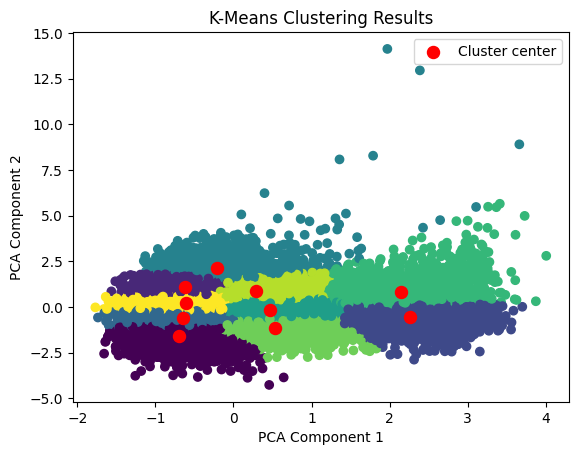

In [ ]:
#another graph of the clusters using dots instead of numbers
kmeans = KMeans(n_clusters=10).fit(X_train)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='.', s=300,
            c='r', label='Cluster center')
plt.title('K-Means Clustering Results')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [ ]:
x = pd.DataFrame(X_train, columns=["PC1", "PC2"])
y = train_target.to_frame()

In [ ]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
#pca transformed data with their respective genres
plot = pd.concat([x, y], axis = 1)

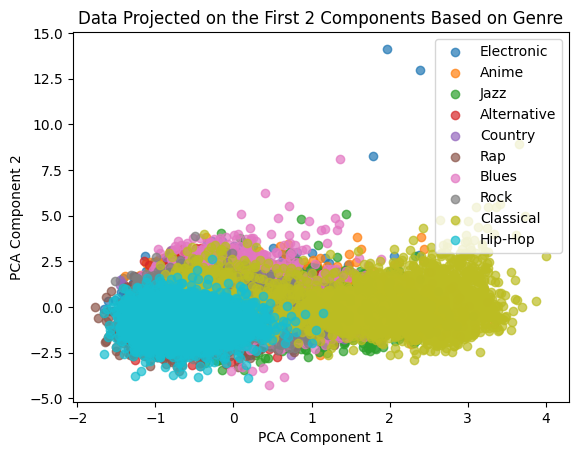

In [ ]:
#plot of data projected on the first 2 components based on genre
fig, ax = plt.subplots()
genres = genre_unique
for genre in genres:
    data = plot[plot["music_genre"] == genre]
    ax.scatter(data["PC1"], data["PC2"], label=genre_unique_cat[genre], alpha=0.7)
ax.legend()
plt.title('Data Projected on the First 2 Components Based on Genre')
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
plt.show()

# SVM

In [ ]:
#will use pca transformed data with 8 components with SVM
pca = PCA(n_components = 8, whiten=True)
X_train = pca.fit_transform(train_features)
X_test = pca.transform(test_features)

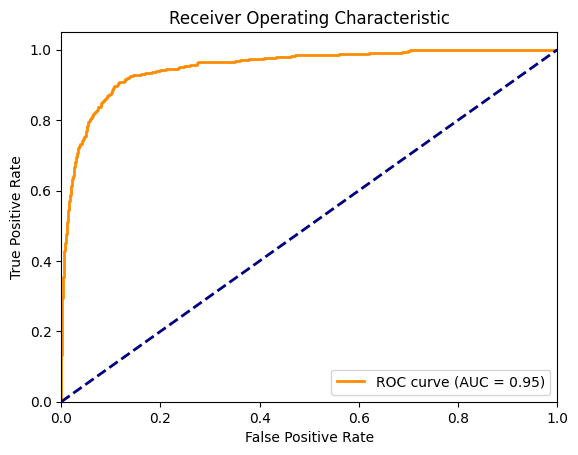

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#create and fit the SVM classifier
classifier = SVC(kernel='rbf', probability=True, random_state=0)
classifier.fit(X_train, train_target)

#predict probabilities for the testing set
y_prob = classifier.predict_proba(X_test)

#calculate the false positive rate and true positive rate for different probability thresholds
fpr, tpr, thresholds = roc_curve(test_target, y_prob[:, 1], pos_label=1)

#calculate the AUC score
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


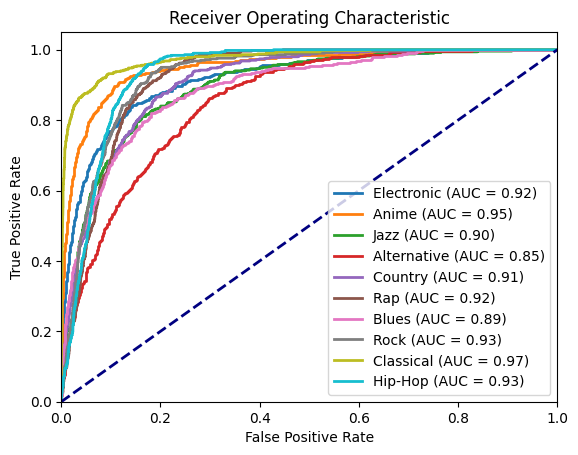

In [ ]:
for i in range(len(genre_unique)):
    genre = i
    fpr, tpr, thresholds = roc_curve(test_target, y_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (genre_unique_cat[i], roc_auc))

#plot the ROC curve for all genres
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
pca = PCA(n_components = 8, whiten=True)
X_train = pca.fit_transform(train_features)
X_test = pca.transform(test_features)
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, train_target)
y_score = clf.predict_proba(X_test)

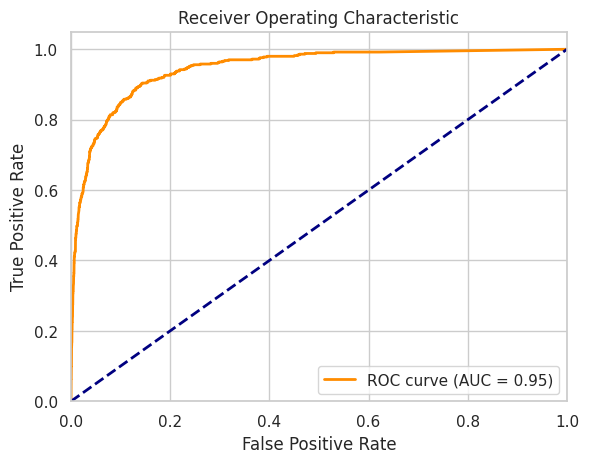

In [ ]:
#calculate the false positive rate and true positive rate for different probability thresholds
fpr, tpr, thresholds = roc_curve(test_target, y_score[:, 1], pos_label=1)

#calculate the AUC score
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

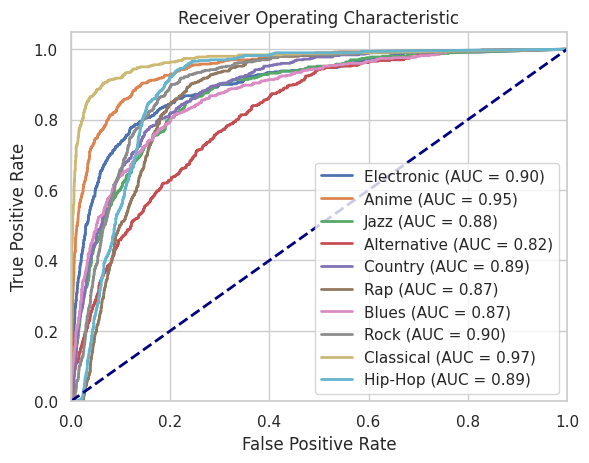

In [ ]:
for i in range(len(genre_unique)):
    genre = i
    fpr, tpr, thresholds = roc_curve(test_target, y_score[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (genre_unique_cat[i], roc_auc))

#plot the ROC curve for all genres
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Get the correlation matrix
corr_matrix = train_features.corr()

# Print the correlation matrix
print(corr_matrix)

                  popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.287211      0.355765    -0.113136   
acousticness       -0.287211      1.000000     -0.347783     0.084110   
danceability        0.355765     -0.347783      1.000000    -0.194504   
duration_ms        -0.113136      0.084110     -0.194504     1.000000   
energy              0.214600     -0.790853      0.264907    -0.089525   
instrumentalness   -0.366967      0.389651     -0.300962     0.168106   
liveness           -0.039774     -0.111528     -0.051052     0.029714   
loudness            0.316119     -0.730226      0.391909    -0.133321   
mode               -0.013895      0.023744     -0.050277    -0.011780   
speechiness         0.225871     -0.160794      0.279551    -0.106919   
tempo               0.037229     -0.236781     -0.004373    -0.045439   
valence             0.123062     -0.270860      0.434120    -0.166848   
key_1              -0.013414      0.003761     -0.0

In [ ]:
sorted_corr = corr_matrix.unstack().sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr != 1]
sorted_corr = sorted_corr[~sorted_corr.duplicated()]
print(sorted_corr)

energy            loudness            0.838703
danceability      valence             0.434120
valence           energy              0.395433
danceability      loudness            0.391909
acousticness      instrumentalness    0.389651
                                        ...   
popularity        instrumentalness   -0.366967
instrumentalness  energy             -0.392575
loudness          instrumentalness   -0.530815
acousticness      loudness           -0.730226
                  energy             -0.790853
Length: 253, dtype: float64
